# Analysis of R_eff for different countries
This code accompanies EWS_disease_emergence.m, and estimates the slope of $R(t)$ when it approaches the transition , $R(t) \to 1$.  
As explained in the main text, we fit a linear trend from the minimum value to $avg(R)=1$, for all considered countries.

#### Requirements:
numpy: 1.19.4  
pandas: 1.1.4         
matplotlib: 2.2.2  
scipy: 1.6.0     

In [3]:
# preliminary setting

import pandas as pd
import numpy as np
import datetime as DT

from matplotlib import pyplot as plt
from matplotlib.dates import date2num, num2date
from matplotlib import dates as mdates
from matplotlib import ticker
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

from scipy import stats
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

import os
from pathlib import Path

from IPython.display import clear_output

cwd = os.getcwd()
parent = Path(cwd).parent

In [2]:
def chi_square_red(y_obs,y_fit,sigma,ddof):
    chi = 0
    for t in range(len(y_obs)):
        chi = chi + ((y_obs[t]-y_fit[t])**2)/((sigma[t]**2)*(len(y_obs)-ddof)) 
    return chi

def lin(x,a,b):
    return a+b*x

## Australia (State of Victoria)

[0.51434343 0.00622086]
[[0.11506857        nan]
 [       nan 0.00171707]]


/Users/daniele.proverbio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in sqrt


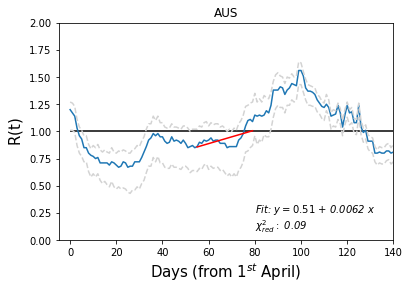

In [26]:
state_name = 'AUS'

path = f'{parent}/csv/'f'{state_name}_rt-estimate.csv'
data = pd.read_csv(path,
                     usecols=['date', 'R_t-estimate', 'Low_50','High_50'],
                     parse_dates=['date'],
                     index_col=['date'],
                     squeeze=True).rename(columns={"R_t-estimate": "meanR"})

idx_start = 10
data = data.iloc[idx_start:]

time = np.linspace(0,len(data)-1,len(data))
err = (data.High_50.values - data.Low_50.values)/2

# -----
fit_start = 55
fit_end = 80
coeff_AUS, cov_AUS = curve_fit(lin,time[fit_start:fit_end],data.meanR.values[fit_start:fit_end],sigma=err[fit_start:fit_end])
fitter_AUS = []
for t in time:
    fitter_AUS.append(lin(t, coeff_AUS[0],coeff_AUS[1]))

chi_s_r_AUS = chi_square_red(data.meanR.values[fit_start:fit_end],fitter_AUS[fit_start:fit_end],err[fit_start:fit_end],ddof=2)
print(coeff_AUS)
print(np.sqrt(cov_AUS))


# Plot ------

fig = plt.figure()
plt.plot(time,data.meanR)
plt.plot(time,data.Low_50,'--',color='lightgrey')
plt.plot(time,data.High_50,'--',color='lightgrey')
plt.ylim(0,2)
plt.xlim(-5,140)
plt.plot(time[fit_start:fit_end],fitter_AUS[fit_start:fit_end],"red")
plt.xlabel("$\mathrm{Days \; (from \;}1^{st} \mathrm{\; April)}$",fontsize = 15)
plt.ylabel("$\mathrm{R(t)}$",fontsize = 15)
plt.title(state_name)
plt.hlines(1,0,160)
plt.text(80,0.25,'Fit: $y = %s$ + %s x'%((round(coeff_AUS[0],2)),(round(coeff_AUS[1],4))),style='italic', fontsize = 10)
plt.text(80,0.10,'$\\chi^2_{red}:$ %s'%(round(chi_s_r_AUS,2)),style='italic', fontsize = 10)

fig.savefig(f'{parent}/Analysis_Reff_plots/Plot_'+state_name+'_Reff.pdf',bbox_inches = "tight",transparent=True)


## Austria

[0.52957384 0.00582765]
[[0.05064409        nan]
 [       nan 0.00068544]]


/Users/daniele.proverbio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in sqrt


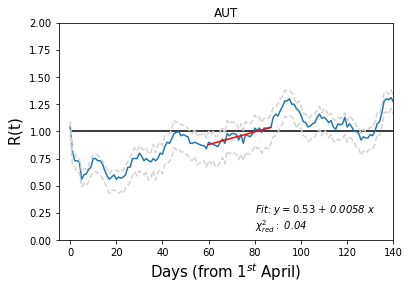

In [25]:
state_name = 'AUT'

path = f'{parent}/csv/'f'{state_name}_rt-estimate.csv'
data = pd.read_csv(path,
                     usecols=['date', 'R_t-estimate', 'Low_50','High_50'],
                     parse_dates=['date'],
                     index_col=['date'],
                     squeeze=True).rename(columns={"R_t-estimate": "meanR"})

idx_start = 10
data = data.iloc[idx_start:]

time = np.linspace(0,len(data)-1,len(data))
err = (data.High_50.values - data.Low_50.values)/2

#  -----

fit_start = 60
fit_end = 88
coeff_AUT, cov_AUT = curve_fit(lin,time[fit_start:fit_end],data.meanR.values[fit_start:fit_end],sigma=err[fit_start:fit_end])
fitter = []
for t in time:
    fitter.append(lin(t, coeff_AUT[0],coeff_AUT[1]))

chi_s_r_AUT = chi_square_red(data.meanR.values[fit_start:fit_end],fitter[fit_start:fit_end],err[fit_start:fit_end],ddof=2)
print(coeff_AUT)
print(np.sqrt(cov_AUT))


# Plot

fig = plt.figure()
plt.plot(time,data.meanR)
plt.plot(time,data.Low_50,'--',color='lightgrey')
plt.plot(time,data.High_50,'--',color='lightgrey')
plt.ylim(0,2)
plt.xlim(-5,140)
plt.plot(time[fit_start:fit_end],fitter[fit_start:fit_end],"red")
plt.xlabel("$\mathrm{Days \; (from \;}1^{st} \mathrm{\; April)}$",fontsize = 15)
plt.ylabel("$\mathrm{R(t)}$",fontsize = 15)
plt.hlines(1,0,160)
plt.text(80,0.25,'Fit: $y = %s$ + %s x'%((round(coeff_AUT[0],2)),(round(coeff_AUT[1],4))),style='italic', fontsize = 10)
plt.text(80,0.10,'$\\chi^2_{red}:$ %s'%(round(chi_s_r_AUT,2)),style='italic', fontsize = 10)
plt.title(state_name)
fig.savefig(f'{parent}/Analysis_Reff_plots/Plot_'+state_name+'_Reff.pdf',bbox_inches = "tight",transparent=True)


## Denmark

[-2.49175339  0.03325084]
[[0.26921481        nan]
 [       nan 0.00262667]]


/Users/daniele.proverbio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in sqrt


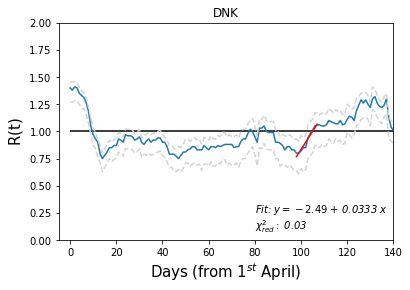

In [24]:
state_name = 'DNK'

path = f'{parent}/csv/'f'{state_name}_rt-estimate.csv'
data = pd.read_csv(path,
                     usecols=['date', 'R_t-estimate', 'Low_50','High_50'],
                     parse_dates=['date'],
                     index_col=['date'],
                     squeeze=True).rename(columns={"R_t-estimate": "meanR"})

idx_start = 10
data = data.iloc[idx_start:]

time = np.linspace(0,len(data)-1,len(data))
err = (data.High_50.values - data.Low_50.values)/2

#  -----

fit_start = 98
fit_end = 108
coeff_DNK, cov_DNK = curve_fit(lin,time[fit_start:fit_end],data.meanR.values[fit_start:fit_end],sigma=err[fit_start:fit_end])
fitter = []

for t in time:
    fitter.append(lin(t, coeff_DNK[0],coeff_DNK[1]))

chi_s_r_DNK = chi_square_red(data.meanR.values[fit_start:fit_end],fitter[fit_start:fit_end],err[fit_start:fit_end],ddof=2)
print(coeff_DNK)
print(np.sqrt(cov_DNK))


# Plot
fig=plt.figure()
plt.plot(time,data.meanR)
plt.plot(time,data.Low_50,'--',color='lightgrey')
plt.plot(time,data.High_50,'--',color='lightgrey')
plt.ylim(0,2)
plt.xlim(-5,140)
plt.plot(time[fit_start:fit_end],fitter[fit_start:fit_end],"red")
plt.xlabel("$\mathrm{Days \; (from \;}1^{st} \mathrm{\; April)}$",fontsize = 15)
plt.ylabel("$\mathrm{R(t)}$",fontsize = 15)
plt.hlines(1,0,160)
plt.text(80,0.25,'Fit: $y = %s$ + %s x'%((round(coeff_DNK[0],2)),(round(coeff_DNK[1],4))),style='italic', fontsize = 10)
plt.text(80,0.10,'$\\chi^2_{red}:$ %s'%(round(chi_s_r_DNK,2)),style='italic', fontsize = 10)
plt.title(state_name)
fig.savefig(f'{parent}/Analysis_Reff_plots/Plot_'+state_name+'_Reff.pdf',bbox_inches = "tight",transparent=True)


## Israel

[-2.41255821  0.05770146]
[[0.58637438        nan]
 [       nan 0.01076765]]


/Users/daniele.proverbio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in sqrt


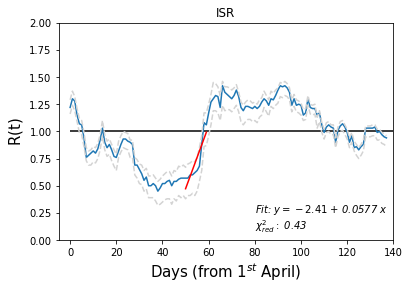

In [23]:
state_name = 'ISR'

path = f'{parent}/csv/'f'{state_name}_rt-estimate.csv'
data = pd.read_csv(path,
                     usecols=['date', 'R_t-estimate', 'Low_50','High_50'],
                     parse_dates=['date'],
                     index_col=['date'],
                     squeeze=True).rename(columns={"R_t-estimate": "meanR"})

idx_start = 10
data = data.iloc[idx_start:]

time = np.linspace(0,len(data)-1,len(data))
err = (data.High_50.values - data.Low_50.values)/2

#  -----

fit_start = 50
fit_end = 60
coeff_ISR, cov_ISR = curve_fit(lin,time[fit_start:fit_end],data.meanR.values[fit_start:fit_end],sigma=err[fit_start:fit_end])
fitter = []

for t in time:
    fitter.append(lin(t, coeff_ISR[0],coeff_ISR[1]))

chi_s_r_ISR = chi_square_red(data.meanR.values[fit_start:fit_end],fitter[fit_start:fit_end],err[fit_start:fit_end],ddof=2)
print(coeff_ISR)
print(np.sqrt(cov_ISR))


# Plot
fig=plt.figure()
plt.plot(time,data.meanR)
plt.plot(time,data.Low_50,'--',color='lightgrey')
plt.plot(time,data.High_50,'--',color='lightgrey')
plt.ylim(0,2)
plt.xlim(-5,140)
plt.plot(time[fit_start:fit_end],fitter[fit_start:fit_end],"red")
plt.xlabel("$\mathrm{Days \; (from \;}1^{st} \mathrm{\; April)}$",fontsize = 15)
plt.ylabel("$\mathrm{R(t)}$",fontsize = 15)
plt.hlines(1,0,160)
plt.text(80,0.25,'Fit: $y = %s$ + %s x'%((round(coeff_ISR[0],2)),(round(coeff_ISR[1],4))),style='italic', fontsize = 10)
plt.text(80,0.10,'$\\chi^2_{red}:$ %s'%(round(chi_s_r_ISR,2)),style='italic', fontsize = 10)
plt.title(state_name)
fig.savefig(f'{parent}/Analysis_Reff_plots/Plot_'+state_name+'_Reff.pdf',bbox_inches = "tight",transparent=True)


## Japan

[-0.1947662   0.01665255]
[[0.12239441        nan]
 [       nan 0.00193209]]


/Users/daniele.proverbio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in sqrt


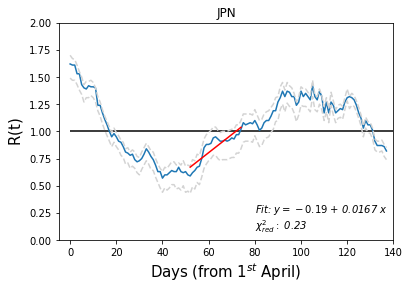

In [22]:
state_name = 'JPN'

path = f'{parent}/csv/'f'{state_name}_rt-estimate.csv'
data = pd.read_csv(path,
                     usecols=['date', 'R_t-estimate', 'Low_50','High_50'],
                     parse_dates=['date'],
                     index_col=['date'],
                     squeeze=True).rename(columns={"R_t-estimate": "meanR"})

idx_start = 10
data = data.iloc[idx_start:]

time = np.linspace(0,len(data)-1,len(data))
err = (data.High_50.values - data.Low_50.values)/2

#  -----

fit_start = 52
fit_end = 75
coeff_JPN, cov_JPN = curve_fit(lin,time[fit_start:fit_end],data.meanR.values[fit_start:fit_end],sigma=err[fit_start:fit_end])
fitter = []

for t in time:
    fitter.append(lin(t, coeff_JPN[0],coeff_JPN[1]))

chi_s_r_JPN = chi_square_red(data.meanR.values[fit_start:fit_end],fitter[fit_start:fit_end],err[fit_start:fit_end],ddof=2)
print(coeff_JPN)
print(np.sqrt(cov_JPN))


# Plot
fig=plt.figure()
plt.plot(time,data.meanR)
plt.plot(time,data.Low_50,'--',color='lightgrey')
plt.plot(time,data.High_50,'--',color='lightgrey')
plt.ylim(0,2)
plt.xlim(-5,140)
plt.plot(time[fit_start:fit_end],fitter[fit_start:fit_end],"red")
plt.xlabel("$\mathrm{Days \; (from \;}1^{st} \mathrm{\; April)}$",fontsize = 15)
plt.ylabel("$\mathrm{R(t)}$",fontsize = 15)
plt.hlines(1,0,160)
plt.text(80,0.25,'Fit: $y = %s$ + %s x'%((round(coeff_JPN[0],2)),(round(coeff_JPN[1],4))),style='italic', fontsize = 10)
plt.text(80,0.10,'$\\chi^2_{red}:$ %s'%(round(chi_s_r_JPN,2)),style='italic', fontsize = 10)
plt.title(state_name)
fig.savefig(f'{parent}/Analysis_Reff_plots/Plot_'+state_name+'_Reff.pdf',bbox_inches = "tight",transparent=True)


## Korea (South)

[-0.96535484  0.01481811]
[[0.2655071         nan]
 [       nan 0.00208451]]


/Users/daniele.proverbio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in sqrt


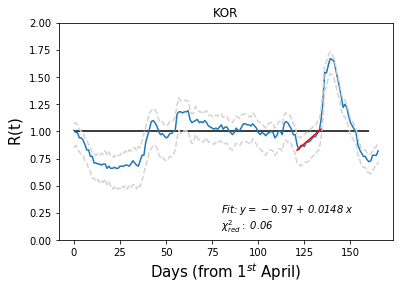

In [11]:
state_name = 'KOR'

path = f'{parent}/csv/'f'{state_name}_rt-estimate.csv'
data = pd.read_csv(path,
                     usecols=['date', 'R_t-estimate', 'Low_50','High_50'],
                     parse_dates=['date'],
                     index_col=['date'],
                     squeeze=True).rename(columns={"R_t-estimate": "meanR"})

idx_start = 10
data = data.iloc[idx_start:]

time = np.linspace(0,len(data)-1,len(data))
err = (data.High_50.values - data.Low_50.values)/2

#  -----

fit_start = 121
fit_end = 135
coeff_KOR, cov_KOR = curve_fit(lin,time[fit_start:fit_end],data.meanR.values[fit_start:fit_end],sigma=err[fit_start:fit_end])
fitter = []

for t in time:
    fitter.append(lin(t, coeff_KOR[0],coeff_KOR[1]))

chi_s_r_KOR = chi_square_red(data.meanR.values[fit_start:fit_end],fitter[fit_start:fit_end],err[fit_start:fit_end],ddof=2)
print(coeff_KOR)
print(np.sqrt(cov_KOR))


# Plot
fig=plt.figure()
plt.plot(time,data.meanR)
plt.plot(time,data.Low_50,'--',color='lightgrey')
plt.plot(time,data.High_50,'--',color='lightgrey')
plt.ylim(0,2)
plt.plot(time[fit_start:fit_end],fitter[fit_start:fit_end],"red")
plt.xlabel("$\mathrm{Days \; (from \;}1^{st} \mathrm{\; April)}$",fontsize = 15)
plt.ylabel("$\mathrm{R(t)}$",fontsize = 15)
plt.hlines(1,0,160)
plt.text(80,0.25,'Fit: $y = %s$ + %s x'%((round(coeff_KOR[0],2)),(round(coeff_KOR[1],4))),style='italic', fontsize = 10)
plt.text(80,0.10,'$\\chi^2_{red}:$ %s'%(round(chi_s_r_KOR,2)),style='italic', fontsize = 10)
plt.title(state_name)
fig.savefig(f'{parent}/Analysis_Reff_plots/Plot_'+state_name+'_Reff.pdf',bbox_inches = "tight",transparent=True)


## Luxembourg

[0.44163701 0.00634217]
[[0.04104576        nan]
 [       nan 0.00064114]]


/Users/daniele.proverbio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in sqrt


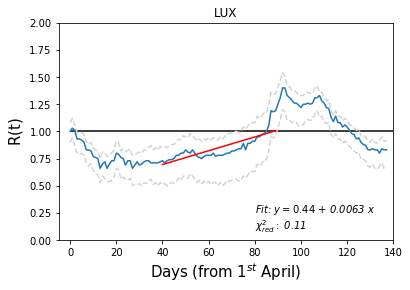

In [21]:
state_name = 'LUX'

path = f'{parent}/csv/'f'{state_name}_rt-estimate.csv'
data = pd.read_csv(path,
                     usecols=['date', 'R_t-estimate', 'Low_50','High_50'],
                     parse_dates=['date'],
                     index_col=['date'],
                     squeeze=True).rename(columns={"R_t-estimate": "meanR"})

idx_start = 10
data = data.iloc[idx_start:]

time = np.linspace(0,len(data)-1,len(data))
err = (data.High_50.values - data.Low_50.values)/2


coeff_LUX, cov_LUX = curve_fit(lin,time[40:90],data.meanR.values[40:90],sigma=err[40:90])
fitter = []
for t in time:
    fitter.append(lin(t, coeff_LUX[0],coeff_LUX[1]))

chi_s_r_LUX = chi_square_red(data.meanR.values[40:90],fitter[40:90],err[40:90],ddof=2)
print(coeff_LUX)
print(np.sqrt(cov_LUX))

# Plot
fig=plt.figure()
plt.plot(time,data.meanR)
plt.plot(time,data.Low_50,'--',color='lightgrey')
plt.plot(time,data.High_50,'--',color='lightgrey')
plt.ylim(0,2)
plt.xlim(-5,140)
plt.plot(time[40:90],fitter[40:90],"red")
plt.xlabel("$\mathrm{Days \; (from \;}1^{st} \mathrm{\; April)}$",fontsize = 15)
plt.ylabel("$\mathrm{R(t)}$",fontsize = 15)
plt.hlines(1,0,140)
plt.text(80,0.25,'Fit: $y = %s$ + %s x'%((round(coeff_LUX[0],2)),(round(coeff_LUX[1],4))),style='italic', fontsize = 10)
plt.text(80,0.10,'$\\chi^2_{red}:$ %s'%(round(chi_s_r_LUX,2)),style='italic', fontsize = 10)
plt.title(state_name)
fig.savefig(f'{parent}/Analysis_Reff_plots/Plot_'+state_name+'_Reff.pdf',bbox_inches = "tight",transparent=True)


## Nepal

[-1.31609005  0.04186596]
[[0.13052186        nan]
 [       nan 0.00266768]]


/Users/daniele.proverbio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in sqrt


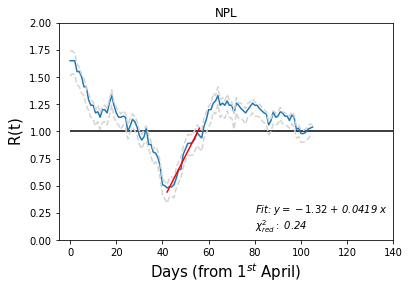

In [20]:
state_name = 'NPL'

path = f'{parent}/csv/'f'{state_name}_rt-estimate.csv'
data = pd.read_csv(path,
                     usecols=['date', 'R_t-estimate', 'Low_50','High_50'],
                     parse_dates=['date'],
                     index_col=['date'],
                     squeeze=True).rename(columns={"R_t-estimate": "meanR"})

idx_start = 10
data = data.iloc[idx_start:]

time = np.linspace(0,len(data)-1,len(data))
err = (data.High_50.values - data.Low_50.values)/2

#  -----

fit_start = 42
fit_end = 57
coeff_NPL, cov_NPL = curve_fit(lin,time[fit_start:fit_end],data.meanR.values[fit_start:fit_end],sigma=err[fit_start:fit_end])
fitter = []

for t in time:
    fitter.append(lin(t, coeff_NPL[0],coeff_NPL[1]))

chi_s_r_NPL = chi_square_red(data.meanR.values[fit_start:fit_end],fitter[fit_start:fit_end],err[fit_start:fit_end],ddof=2)
print(coeff_NPL)
print(np.sqrt(cov_NPL))


# Plot
fig=plt.figure()
plt.plot(time,data.meanR)
plt.plot(time,data.Low_50,'--',color='lightgrey')
plt.plot(time,data.High_50,'--',color='lightgrey')
plt.ylim(0,2)
plt.xlim(-5,140)
plt.plot(time[fit_start:fit_end],fitter[fit_start:fit_end],"red")
plt.xlabel("$\mathrm{Days \; (from \;}1^{st} \mathrm{\; April)}$",fontsize = 15)
plt.ylabel("$\mathrm{R(t)}$",fontsize = 15)
plt.hlines(1,0,160)
plt.text(80,0.25,'Fit: $y = %s$ + %s x'%((round(coeff_NPL[0],2)),(round(coeff_NPL[1],4))),style='italic', fontsize = 10)
plt.text(80,0.10,'$\\chi^2_{red}:$ %s'%(round(chi_s_r_NPL,2)),style='italic', fontsize = 10)
plt.title(state_name)
fig.savefig(f'{parent}/Analysis_Reff_plots/Plot_'+state_name+'_Reff.pdf',bbox_inches = "tight",transparent=True)


## Singapore

[0.01456907 0.0095537 ]
[[0.23781793        nan]
 [       nan 0.00263144]]


/Users/daniele.proverbio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in sqrt


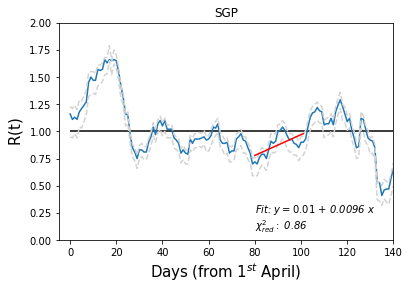

In [19]:
state_name = 'SGP'

path = f'{parent}/csv/'f'{state_name}_rt-estimate.csv'
data = pd.read_csv(path,
                     usecols=['date', 'R_t-estimate', 'Low_50','High_50'],
                     parse_dates=['date'],
                     index_col=['date'],
                     squeeze=True).rename(columns={"R_t-estimate": "meanR"})

idx_start = 10
data = data.iloc[idx_start:]

time = np.linspace(0,len(data)-1,len(data))
err = (data.High_50.values - data.Low_50.values)/2

#  -----

fit_start = 80
fit_end = 102
coeff_SGP, cov_SGP = curve_fit(lin,time[fit_start:fit_end],data.meanR.values[fit_start:fit_end],sigma=err[fit_start:fit_end])
fitter = []

for t in time:
    fitter.append(lin(t, coeff_SGP[0],coeff_SGP[1]))

chi_s_r_SGP = chi_square_red(data.meanR.values[fit_start:fit_end],fitter[fit_start:fit_end],err[fit_start:fit_end],ddof=2)
print(coeff_SGP)
print(np.sqrt(cov_SGP))


# Plot
fig=plt.figure()
plt.plot(time,data.meanR)
plt.plot(time,data.Low_50,'--',color='lightgrey')
plt.plot(time,data.High_50,'--',color='lightgrey')
plt.ylim(0,2)
plt.xlim(-5,140)
plt.plot(time[fit_start:fit_end],fitter[fit_start:fit_end],"red")
plt.xlabel("$\mathrm{Days \; (from \;}1^{st} \mathrm{\; April)}$",fontsize = 15)
plt.ylabel("$\mathrm{R(t)}$",fontsize = 15)
plt.hlines(1,0,160)
plt.text(80,0.25,'Fit: $y = %s$ + %s x'%((round(coeff_SGP[0],2)),(round(coeff_SGP[1],4))),style='italic', fontsize = 10)
plt.text(80,0.10,'$\\chi^2_{red}:$ %s'%(round(chi_s_r_SGP,2)),style='italic', fontsize = 10)
plt.title(state_name)
fig.savefig(f'{parent}/Analysis_Reff_plots/Plot_'+state_name+'_Reff.pdf',bbox_inches = "tight",transparent=True)


## Veneto

[0.20263622 0.01095308]
[[0.0270612         nan]
 [       nan 0.00049636]]


/Users/daniele.proverbio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in sqrt


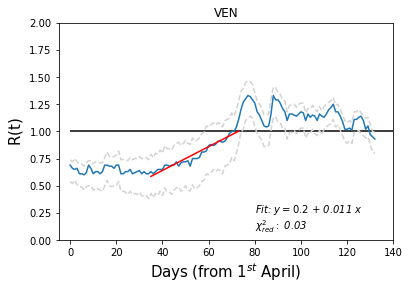

In [18]:
state_name = 'VEN'

path = f'{parent}/csv/'f'{state_name}_rt-estimate.csv'
data = pd.read_csv(path,
                     usecols=['date', 'R_t-estimate', 'Low_50','High_50'],
                     parse_dates=['date'],
                     index_col=['date'],
                     squeeze=True).rename(columns={"R_t-estimate": "meanR"})

idx_start = 10
data = data.iloc[idx_start:]

time = np.linspace(0,len(data)-1,len(data))
err = (data.High_50.values - data.Low_50.values)/2

#  -----

fit_start = 35
fit_end = 74
coeff_VEN, cov_VEN = curve_fit(lin,time[fit_start:fit_end],data.meanR.values[fit_start:fit_end],sigma=err[fit_start:fit_end])
fitter = []

for t in time:
    fitter.append(lin(t, coeff_VEN[0],coeff_VEN[1]))

chi_s_r_VEN = chi_square_red(data.meanR.values[fit_start:fit_end],fitter[fit_start:fit_end],err[fit_start:fit_end],ddof=2)
print(coeff_VEN)
print(np.sqrt(cov_VEN))


# Plot
fig=plt.figure()
plt.plot(time,data.meanR)
plt.plot(time,data.Low_50,'--',color='lightgrey')
plt.plot(time,data.High_50,'--',color='lightgrey')
plt.ylim(0,2)
plt.xlim(-5,140)
plt.plot(time[fit_start:fit_end],fitter[fit_start:fit_end],"red")
plt.xlabel("$\mathrm{Days \; (from \;}1^{st} \mathrm{\; April)}$",fontsize = 15)
plt.ylabel("$\mathrm{R(t)}$",fontsize = 15)
plt.hlines(1,0,160)
plt.text(80,0.25,'Fit: $y = %s$ + %s x'%((round(coeff_VEN[0],2)),(round(coeff_VEN[1],4))),style='italic', fontsize = 10)
plt.text(80,0.10,'$\\chi^2_{red}:$ %s'%(round(chi_s_r_VEN,2)),style='italic', fontsize = 10)
plt.title(state_name)
fig.savefig(f'{parent}/Analysis_Reff_plots/Plot_'+state_name+'_Reff.pdf',bbox_inches = "tight",transparent=True)


# Slopes together

([<matplotlib.axis.XTick at 0x7fd9d6076350>,
 <a list of 10 Text xticklabel objects>)

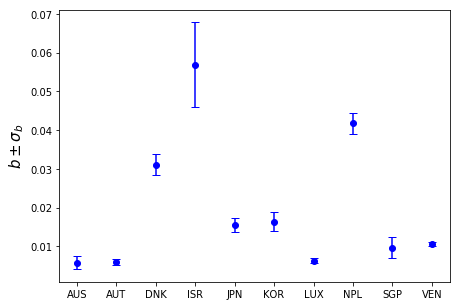

In [18]:
coeffs = [coeff_AUS[1], coeff_AUT[1], coeff_DNK[1], coeff_ISR[1], coeff_JPN[1], coeff_KOR[1], coeff_LUX[1], coeff_NPL[1], coeff_SGP[1],coeff_VEN[1]]
coeffs_err = np.sqrt([cov_AUS[1][1],cov_AUT[1][1],cov_DNK[1][1],cov_ISR[1][1],cov_JPN[1][1],cov_KOR[1][1],cov_LUX[1][1],cov_NPL[1][1],cov_SGP[1][1],cov_VEN[1][1]])
N = len(coeffs)
ind = np.arange(N)

fig= plt.figure(figsize=(7,5))
plt.errorbar(ind,coeffs,coeffs_err,color="b",ecolor="b",fmt="o", capsize=4)
#plt.xlabel("$t$ [cycle]",fontsize = 15)
plt.ylabel("$b \pm \sigma_b$",fontsize = 15)
plt.xticks(ind, ('AUS', 'AUT', 'DNK', 'ISR', 'JPN','KOR','LUX','NPL','SGP','VEN'))

In [21]:
print("Slope coefficients = ", coeffs)
print("Associated uncertainties = ", coeffs_err)

Slope coefficients =  [0.005739122684695686, 0.005898078570848705, 0.031014346436241756, 0.05695675831203578, 0.015549366967717469, 0.016384651678154526, 0.006244777367054312, 0.041800694995459575, 0.009668807123256313, 0.01068913807677669]
Associated uncertainties =  [0.00172323 0.00075726 0.00271732 0.0108944  0.00186428 0.00247467
 0.00064815 0.00269251 0.00269641 0.00048851]
